In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline


In [50]:
dataset=pd.read_csv('/content/winequality_red.csv')
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [51]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [52]:
print(x)


[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [53]:
print(y)

[5 5 5 ... 6 5 6]


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

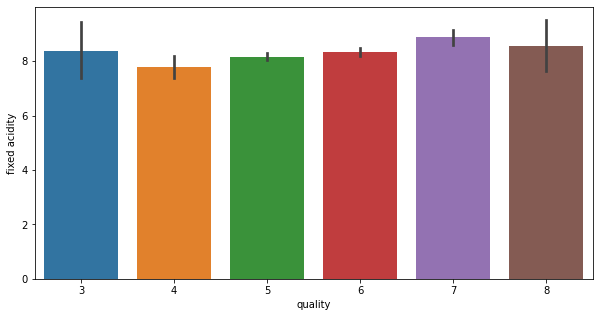

In [57]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='fixed acidity',data=dataset)



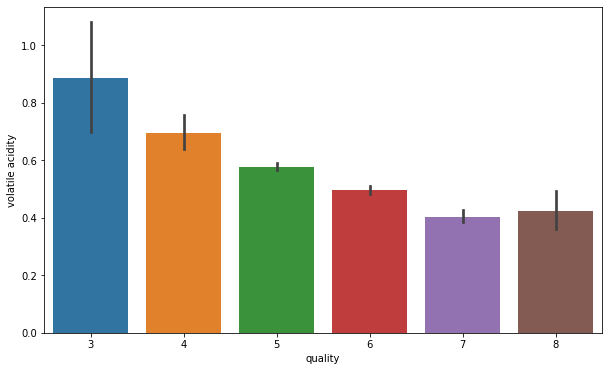

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=dataset)

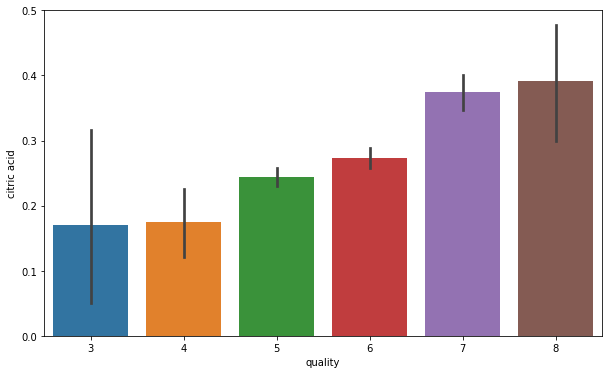

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=dataset)  
            

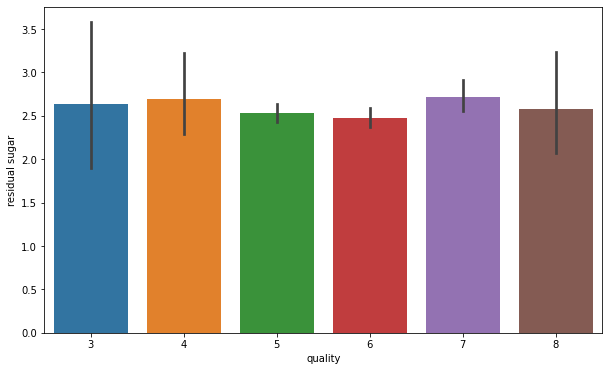

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=dataset)  

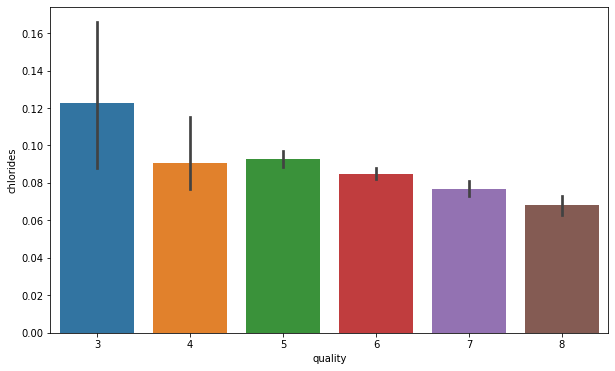

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=dataset)

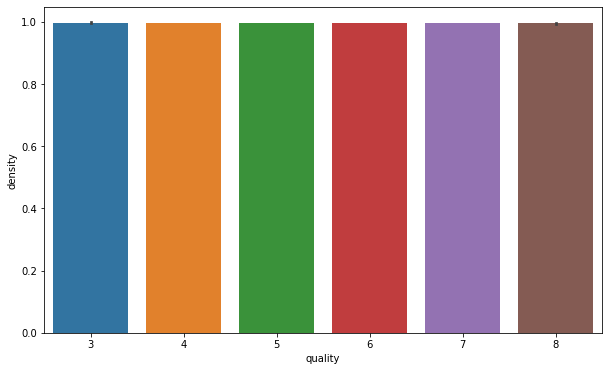

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='density',data=dataset)

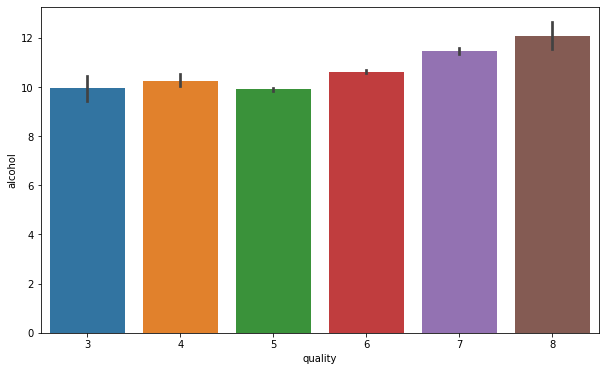

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=dataset)

In [64]:
bins=(3,6.5,8)
group_names=['bad','good']
dataset['quality']=pd.cut(dataset['quality'],bins=bins,labels=group_names)

In [65]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [66]:
print(y)

[5 5 5 ... 6 5 6]


In [67]:
type(y)

numpy.ndarray

In [68]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['quality']=le.fit_transform(dataset['quality'].astype(str))


In [70]:
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        0
1            7.8              0.88         0.00  ...       0.68      9.8        0
2            7.8              0.76         0.04  ...       0.65      9.8        0
3           11.2              0.28         0.56  ...       0.58      9.8        0
4            7.4              0.70         0.00  ...       0.56      9.4        0

[5 rows x 12 columns]


In [71]:
print(y)

[5 5 5 ... 6 5 6]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


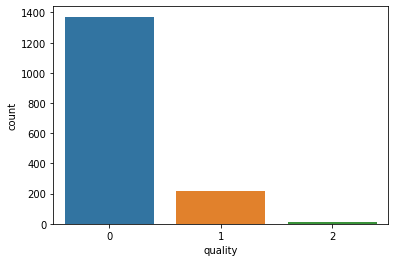

In [72]:
sns.countplot(dataset['quality'])

In [73]:
print(dataset['quality'].value_counts())

0    1372
1     217
2      10
Name: quality, dtype: int64


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
from xgboost import XGBClassifier
c=XGBClassifier()
c.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=c.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[  0   0   1   0   0   0]
 [  1   0  10   2   0   0]
 [  0   0 108  31   1   0]
 [  0   1  33  82  18   0]
 [  0   0   3  13  14   0]
 [  0   0   0   1   1   0]]
0.6375


In [78]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_gb=gn.predict(x_test)
cm=confusion_matrix(y_test,y_gb)
print(cm)
print(accuracy_score(y_test,y_gb))

[[  0   1   0   0   0   0]
 [  1   0   6   6   0   0]
 [  0   4 101  27   8   0]
 [  0   5  39  61  28   1]
 [  0   0   4   7  19   0]
 [  0   0   0   0   2   0]]
0.565625


In [80]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier(criterion='entropy',random_state=5)
ds.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_dtc=ds.predict(x_test)
print(confusion_matrix(y_test,y_dtc))
print(accuracy_score(y_test,y_dtc))


[[  0   0   1   0   0   0]
 [  0   2   7   3   1   0]
 [  2   1 108  26   3   0]
 [  0   5  34  75  18   2]
 [  0   0   5   9  16   0]
 [  0   0   0   0   1   1]]
0.63125


In [82]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=136,criterion='entropy',random_state=1)
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=136,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_rfc=rc.predict(x_test)
print(confusion_matrix(y_test,y_rfc))
print(accuracy_score(y_test,y_rfc))

[[  0   0   1   0   0   0]
 [  0   1  10   2   0   0]
 [  0   0 119  20   1   0]
 [  0   0  24 103   7   0]
 [  0   0   2  15  13   0]
 [  0   0   0   0   1   1]]
0.740625


In [84]:
from sklearn.neighbors import KNeighborsClassifier


In [85]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_knn=rc.predict(x_test)


In [86]:

from sklearn.metrics import confusion_matrix,accuracy_score
y_knn=knn.predict(x_test)
print(confusion_matrix(y_test,y_knn))
print(accuracy_score(y_test,y_knn))





[[ 0  0  0  1  0  0]
 [ 0  1  9  3  0  0]
 [ 0  1 99 38  2  0]
 [ 0  0 47 74 13  0]
 [ 0  0  6 17  7  0]
 [ 0  0  0  0  2  0]]
0.565625


In [87]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_svm=svm.predict(x_test)
print(confusion_matrix(y_test,y_svm))
print(accuracy_score(y_test,y_svm))


[[  0   0   0   1   0   0]
 [  0   0  11   2   0   0]
 [  0   0 105  35   0   0]
 [  0   0  43  84   7   0]
 [  0   0   3  20   7   0]
 [  0   0   0   1   1   0]]
0.6125


In [89]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=svm,X=x_train,y=y_train,cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('standerd Division: {:.2f} %'.format(accuracies.std()*100))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 62.70 %
standerd Division: 5.07 %


In [90]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
grid_search=GridSearchCV(estimator=rc,param_grid=parameters,cv=5)
grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print('Best Accuracy: {:.2f} %'.format(best_accuracy.mean()*100))
print('Best parameters: ',best_parameters)

Best Accuracy: 66.46 %
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [91]:
from xgboost import XGBClassifier
import pickle

In [94]:
pickle.dump(rc,open('model.pkl','wb'))
wine_classification_model=pickle.load(open('model.pkl','rb'))
y_pred=wine_classification_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  0   0   1   0   0   0]
 [  0   1  10   2   0   0]
 [  0   0 119  20   1   0]
 [  0   0  24 103   7   0]
 [  0   0   2  15  13   0]
 [  0   0   0   0   1   1]]
0.740625
